In [356]:
#Importing python packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time
#Creating Lists for storing data
TrainTime = []
TestTime = []
Accuracy_List = []
Algorithems = ['SVM','KNN','Decision Tree','Neural Network','Neural Network Tuned']

In [357]:
#Reading CSV
dataset = pd.read_csv('heart.csv')

In [358]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [359]:
#Checking Information of CSV
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [360]:
#Checking Unique Values in data
dataset.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

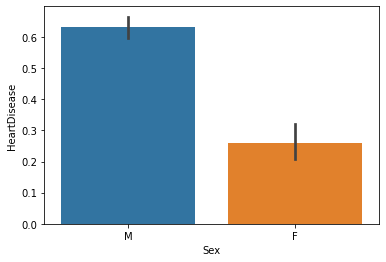

In [361]:
#Checking Classification on Sex
sns.barplot(data = dataset, x = 'Sex' , y = 'HeartDisease')

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

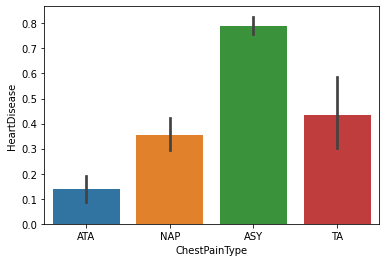

In [362]:
#Checking Classification on ChestPainType
sns.barplot(data = dataset, x = 'ChestPainType' , y = 'HeartDisease')

<AxesSubplot:xlabel='ST_Slope', ylabel='HeartDisease'>

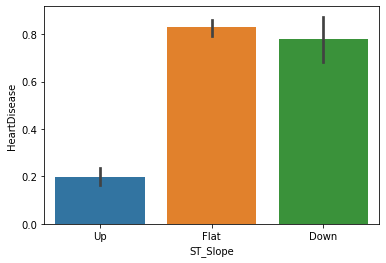

In [363]:
#Checking Classification on ST_Slope
sns.barplot(data = dataset, x = 'ST_Slope' , y = 'HeartDisease')

<AxesSubplot:xlabel='RestingECG', ylabel='HeartDisease'>

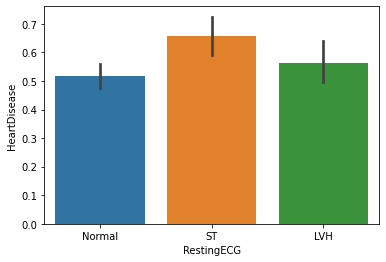

In [364]:
#Checking Classification on RestingECG
sns.barplot(data = dataset, x = 'RestingECG' , y = 'HeartDisease')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='HeartDisease'>

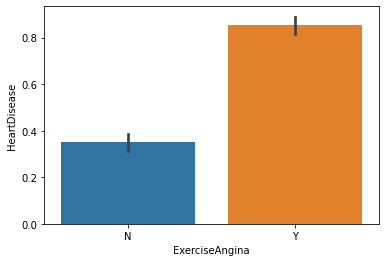

In [365]:
#Checking Classification on ExerciseAngina
sns.barplot(data = dataset, x = 'ExerciseAngina' , y = 'HeartDisease')

<AxesSubplot:xlabel='FastingBS', ylabel='HeartDisease'>

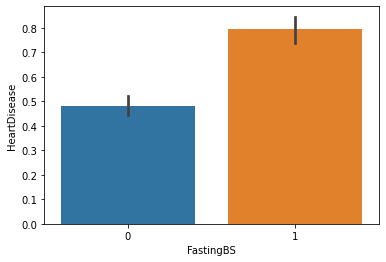

In [366]:
#Checking Classification on FastingBS
sns.barplot(data = dataset, x = 'FastingBS' , y = 'HeartDisease')

<AxesSubplot:xlabel='Age', ylabel='HeartDisease'>

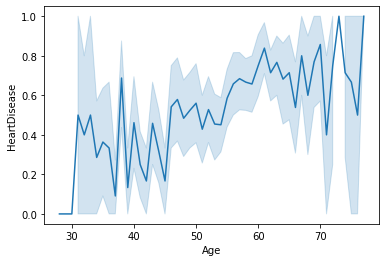

In [367]:
#Checking Classification on Age
sns.lineplot(data = dataset, x = 'Age' , y = 'HeartDisease')

In [368]:
#Replacing all string data with numerical Data
dataset['Sex'].replace({'M':1,'F':0}, inplace = True)
dataset['ChestPainType'].replace({'TA':0,'ASY':1,'ATA':2,'NAP':3}, inplace = True)
dataset['ST_Slope'].replace({'Down':0,'Flat':1,'Up':2}, inplace = True)
dataset['RestingECG'].replace({'Normal':0,'LVH':1,'ST':2}, inplace = True)
dataset['ExerciseAngina'].replace({'N':1,'Y':0}, inplace = True)

In [369]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,1,0.0,2,0
1,49,0,3,160,180,0,0,156,1,1.0,1,1
2,37,1,2,130,283,0,2,98,1,0.0,2,0
3,48,0,1,138,214,0,0,108,0,1.5,1,1
4,54,1,3,150,195,0,0,122,1,0.0,2,0


In [370]:
#Seperating Labels from Data
x = dataset.drop('HeartDisease', axis=1)
y = dataset['HeartDisease']

In [371]:
#Spliting Data in train and test
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [372]:
#SVM Training and Testing and Execution time Calculation
Model = svm.SVC(kernel = 'linear')
start = time.time()
Model.fit(train_x,train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

In [373]:
# SVM Accuracy Calculation
Accuracy = Model.score(test_x,test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  85.33 %


In [374]:
# SVM Confusion matrix
confusion_matrix(test_y,predict_y)

array([[62, 15],
       [12, 95]], dtype=int64)

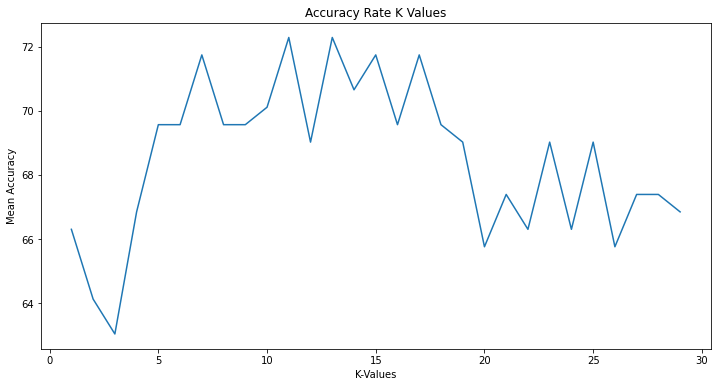

Maximum Accuracy:  72.28260869565217 at K = 11


In [375]:
# KNN checking for best Accuracy
acc = []
for k in range(1,30):
    Model = KNeighborsClassifier(k)
    Model.fit(train_x,train_y)
    predict_y = Model.predict(test_x)
    acc.append(Model.score(test_x,test_y)*100)
plt.figure(figsize=(12,6))
plt.plot(range(1,30),acc)
plt.title('Accuracy Rate K Values')
plt.xlabel('K-Values')
plt.ylabel('Mean Accuracy')
plt.show()
print("Maximum Accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

In [376]:
#KNN Training and Testing and Execution Time Calculation 
Model = KNeighborsClassifier(n_neighbors=11)  
start = time.time()
Model.fit(train_x, train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

In [377]:
# KNN Accuracy
Accuracy = Model.score(test_x,test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  72.28 %


In [378]:
# KNN Confuxion Matrix
confusion_matrix(test_y, predict_y)

array([[54, 23],
       [28, 79]], dtype=int64)

In [379]:
#Decision Tree Training and Testing Execution Time Calculation
Model = DecisionTreeClassifier(max_depth=3)
start = time.time()
Model.fit(train_x, train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

In [380]:
# Decision Tree Accuracy
Accuracy = Model.score(test_x, test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  80.43 %


In [381]:
confusion_matrix(test_y, predict_y)

array([[59, 18],
       [18, 89]], dtype=int64)

In [382]:
Model = MLPClassifier(random_state=1)
start = time.time()
Model.fit(train_x, train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [383]:
Accuracy = tree.score(test_x, test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  80.43 %


In [384]:
confusion_matrix(test_y, predict_y)

array([[67, 10],
       [22, 85]], dtype=int64)

In [385]:
Model = MLPClassifier(activation='tanh',solver='sgd',alpha=0.05,hidden_layer_sizes=(4000,10),random_state=1)
start = time.time()
Model.fit(train_x, train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

In [386]:
Accuracy = tree.score(test_x, test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  80.43 %


In [387]:
confusion_matrix(test_y, predict_y)

array([[54, 23],
       [30, 77]], dtype=int64)

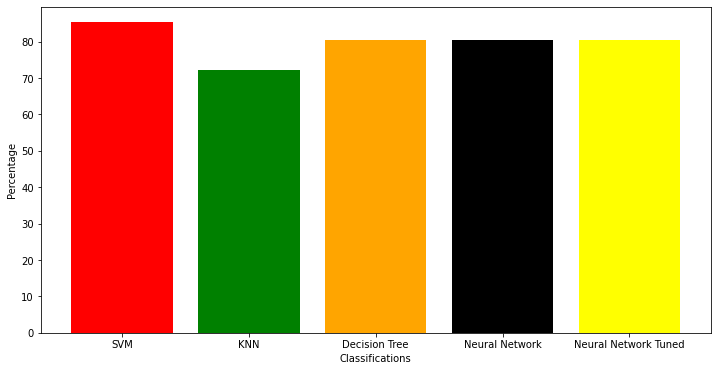

In [388]:
c = ["red", "green", "orange", "black", "yellow"]
plt.figure(figsize=(12,6))
plt.bar(Algorithems,Accuracy_List, color=c)
plt.xlabel("Classifications")
plt.ylabel("Percentage")
plt.show()

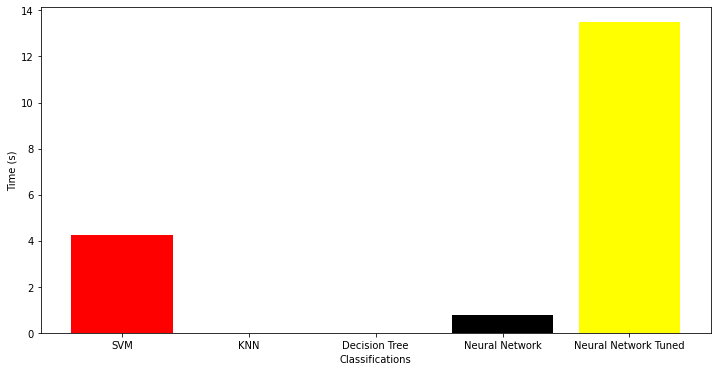

In [389]:
c = ["red", "green", "orange", "black", "yellow"]
plt.figure(figsize=(12,6))
plt.bar(Algorithems,TrainTime, color=c)
plt.xlabel("Classifications")
plt.ylabel("Time (s)")
plt.show()

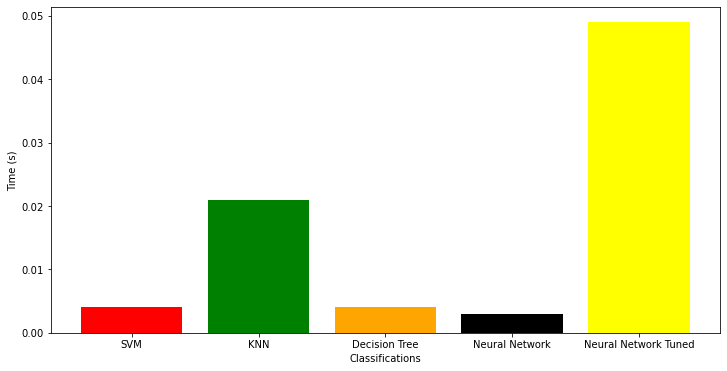

In [390]:
c = ["red", "green", "orange", "black", "yellow"]
plt.figure(figsize=(12,6))
plt.bar(Algorithems,TestTime, color=c)
plt.xlabel("Classifications")
plt.ylabel("Time (s)")
plt.show()

In [391]:
result = pd.DataFrame({'Titles': Algorithems,
             'Accuracy (%)':Accuracy_List,
             'Train Time (s)': TrainTime,
             'Test Time (s)':TestTime})

In [392]:
result

,Titles,Accuracy (%),Train Time (s),Test Time (s)
0,SVM,85.326087,4.246571,0.003998
1,KNN,72.282609,0.007996,0.020987
2,Decision Tree,80.434783,0.007995,0.003998
3,Neural Network,80.434783,0.769559,0.003000
4,Neural Network Tuned,80.434783,13.490282,0.048972
